In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from pprint import pprint
from matplotlib import cm
from collections import Counter
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from time import time
my_cmap = ListedColormap(sns.color_palette("Paired", 10))

# Breast Cancer Dataset Work - (eventually scratched)

In [3]:
data = pd.read_csv('data/median_filled.csv')
data = data.drop('Unnamed: 0', axis=1)
# data.head()

In [4]:
labels_data = pd.read_csv('data/PAM50_proteins.csv')
# labels_data.head()

In [5]:
set1 = set(labels_data.RefSeqProteinID)
set2 = set(data.columns)
label_dict = {}
lookup_dict = {}
for i in labels_data[['GeneSymbol', 'RefSeqProteinID']].itertuples():
    if i[2] in set2:
        lookup_dict[i[2]] = i[1]
        if i[1] not in label_dict:
            label_dict[i[1]] = set()
        label_dict[i[1]].add(i[2])
# pprint(lookup_dict)
# pprint(label_dict)

In [6]:
def plot_digits(x, y, type, num_types = 10):
    # Create Figure and axes
    fig, axs = plt.subplots(figsize=(10, 10))
    
    # Plot each class separately
    for idx in range(num_types):
        xx = x[(y == idx)]
        
        # Plot the instances of each class in projected dimensions
        axs.scatter(xx[:, 0], xx[:, 1], s=25, 
                    color=my_cmap(idx), alpha=0.75,
                    label=idx)
        
        # Compute class centers and mark with text label
        xc, yc = np.mean(xx, axis=0)
        axs.text(xc, yc, str(idx), weight='normal', size=16, 
                 backgroundcolor='white')

        # Decorate plot with legend and labels.
        axs.legend(fontsize='medium', bbox_to_anchor=(1.05, 1.05))

        axs.set(title='Digit Data',
                xlabel='First Component',
                ylabel='Second Component')
        
        # Clean plot
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        sns.despine(offset=10)

# Mice Protein Dataset Work - (from the report)

In [9]:
mice = pd.read_excel('data/Data_Cortex_Nuclear.xls')
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [10]:
mice_filled = mice.fillna(0)
mice_filled.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [11]:
mice_data = mice_filled[mice_filled.columns[1:-4]].values
# print(mice_data)
kmodel = KMeans(n_clusters=8, random_state=5).fit(mice_data)
# print(kmodel.cluster_centers_)
labels = set(kmodel.labels_)

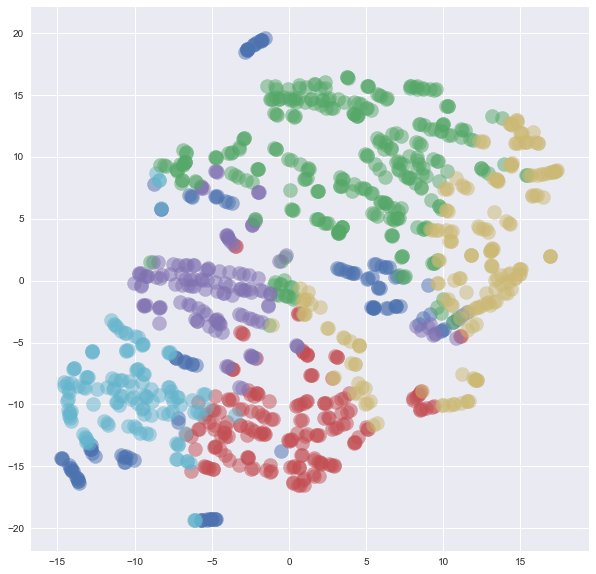

In [73]:
mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    # Convert index into an int
    ax.scatter(mice_tsne.embedding_[:, 0][kmodel.labels_ == i], mice_tsne.embedding_[:, 1][kmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
# plt.scatter(mice_tsne.embedding_[:, 0], mice_tsne.embedding_[:, 1])
plt.show()

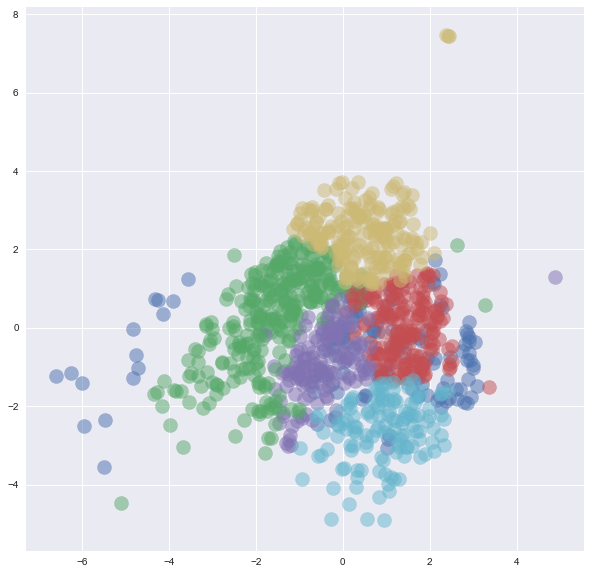

In [75]:
mds_model = MDS(random_state=5).fit_transform(mice_data)
# plt.scatter(mds_model[:, 0], mds_model[:, 1])
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    # Convert index into an int
    ax.scatter(mds_model[:, 0][kmodel.labels_ == i], mds_model[:, 1][kmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
plt.show()

In [113]:
classes = set(mice_filled['class'])
print(classes)
init_centers = [mice_filled[mice_filled['class'] == x].values[0,1:-4] for x in classes]
# mice_filled[mice_filled['class'] == 't-SC-s'].values[0,1:-4]

{'t-CS-m', 'c-SC-m', 't-SC-m', 'c-SC-s', 'c-CS-s', 'c-CS-m', 't-CS-s', 't-SC-s'}


In [114]:
# mice_filled[mice_filled['class'] == 't-SC-s']

In [135]:
# for i in range(8):
#     pprint(Counter(mice_filled['class'][i == kmodel.labels_]))

In [116]:
init_centers = np.array(init_centers)
print(init_centers.shape)
kmod2 = KMeans(n_clusters=8, init=init_centers).fit(mice_data)

(8, 77)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


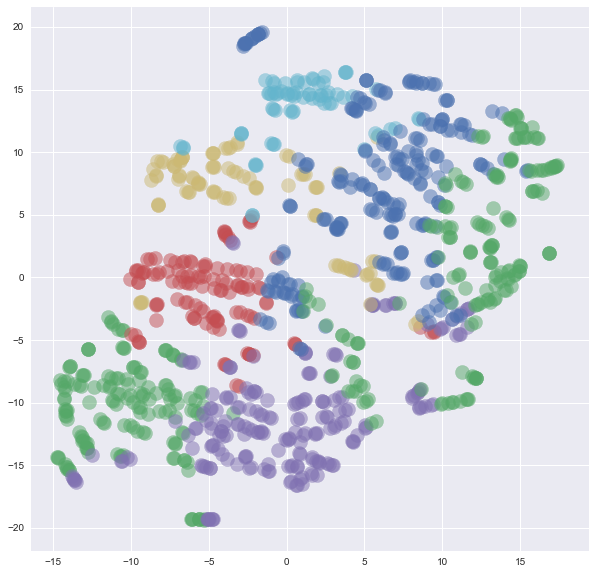

In [117]:
mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    ax.scatter(mice_tsne.embedding_[:, 0][kmod2.labels_ == i], mice_tsne.embedding_[:, 1][kmod2.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
plt.show()

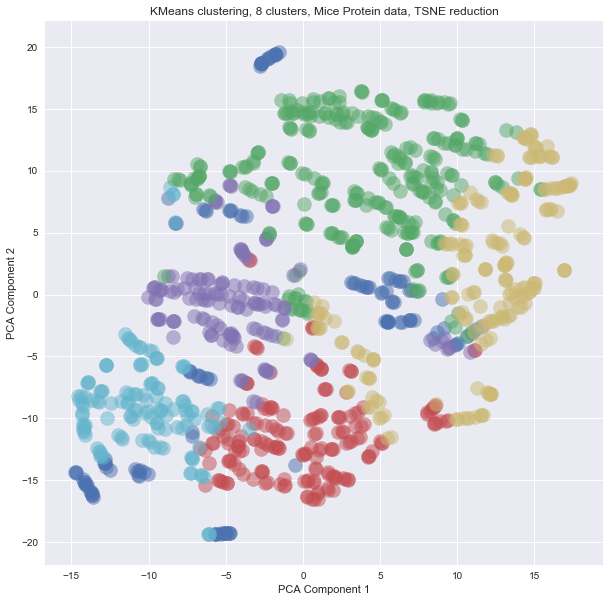

In [123]:
mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    ax.scatter(mice_tsne.embedding_[:, 0][kmodel.labels_ == i], mice_tsne.embedding_[:, 1][kmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
ax.set_title('KMeans clustering, 8 clusters, Mice Protein data, TSNE reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.show()

In [136]:
# for i in range(8):
#     pprint(Counter(mice_filled['class'][i == kmod2.labels_]))

In [120]:
print(calinski_harabaz_score(mice_data, kmod2.labels_))
print(calinski_harabaz_score(mice_data, kmodel.labels_))

244.317487079
248.616657223


118.598784593
0.162357242531


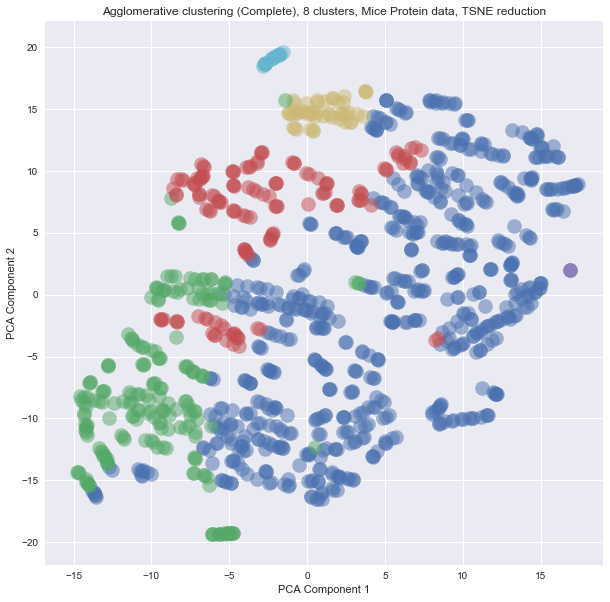

In [12]:
aggmodel = AgglomerativeClustering(n_clusters=8, linkage='complete').fit(mice_data)

print(calinski_harabaz_score(mice_data, aggmodel.labels_))
print(silhouette_score(mice_data, aggmodel.labels_))

mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    ax.scatter(mice_tsne.embedding_[:, 0][aggmodel.labels_ == i], mice_tsne.embedding_[:, 1][aggmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
ax.set_title('Agglomerative clustering (Complete), 8 clusters, Mice Protein data, TSNE reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


123.694164101
0.130645327309


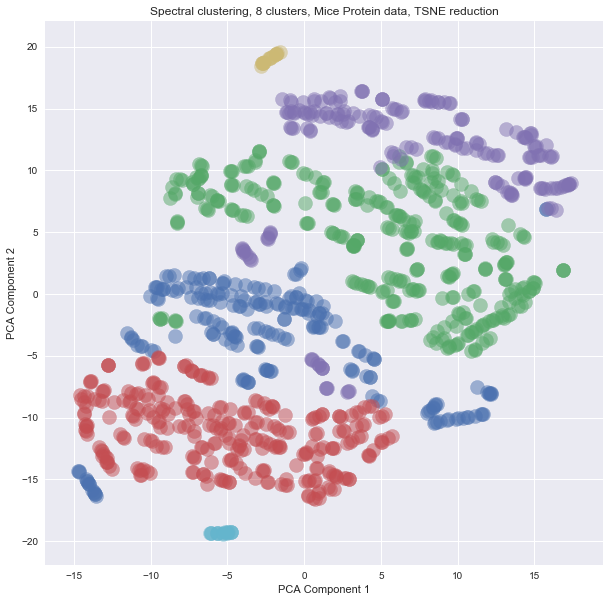

In [137]:
specmod = SpectralClustering(n_clusters=8, eigen_solver='arpack', affinity='nearest_neighbors').fit(mice_data)
print(calinski_harabaz_score(mice_data, specmod.labels_))
print(silhouette_score(mice_data, specmod.labels_))

mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in labels:
    ax.scatter(mice_tsne.embedding_[:, 0][specmod.labels_ == i], mice_tsne.embedding_[:, 1][specmod.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
ax.set_title('Spectral clustering, 8 clusters, Mice Protein data, TSNE reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.show()

This is how I timed the algorithms

In [13]:
total = 0.0
n = 100
for i in range(n):
    t0 = time()
    kmodel = KMeans(n_clusters=8, random_state=5).fit(mice_data)
    t1 = time()
    total += t1-t0
average = total / n
print(average)

0.14118131637573242


## From here I started trying to cluster Treatment type while holding Genotype and Behavior contant

In [8]:
mice_filled.groupby('Treatment').head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
300,3477_1,0.591618,0.814980,0.414980,2.706108,5.256264,0.260990,0.187249,4.163798,0.265894,...,0.096318,0.400048,0.154416,0.135307,0.000000,1.399615,Control,Saline,C/S,c-CS-s
301,3477_2,0.589807,0.840445,0.424325,2.803702,5.534373,0.269420,0.192834,4.284555,0.275985,...,0.112301,0.398866,0.163800,0.139480,0.000000,1.410978,Control,Saline,C/S,c-CS-s
302,3477_3,0.598902,0.886041,0.444760,2.918261,5.717712,0.290435,0.197162,4.497666,0.282288,...,0.109363,0.378731,0.154110,0.143156,0.000000,1.332266,Control,Saline,C/S,c-CS-s
303,3477_4,0.544844,0.726999,0.390846,2.521089,4.967323,0.275550,0.190962,4.576825,0.240209,...,0.099507,0.385510,0.177962,0.141927,0.000000,1.394424,Control,Saline,C/S,c-CS-s
304,3477_5,0.512785,0.730650,0.389176,2.514047,5.070519,0.271872,0.188625,4.548217,0.238390,...,0.114604,0.385776,0.184140,0.154982,0.000000,1.366823,Control,Saline,C/S,c-CS-s


328.768136508
0.201318801851


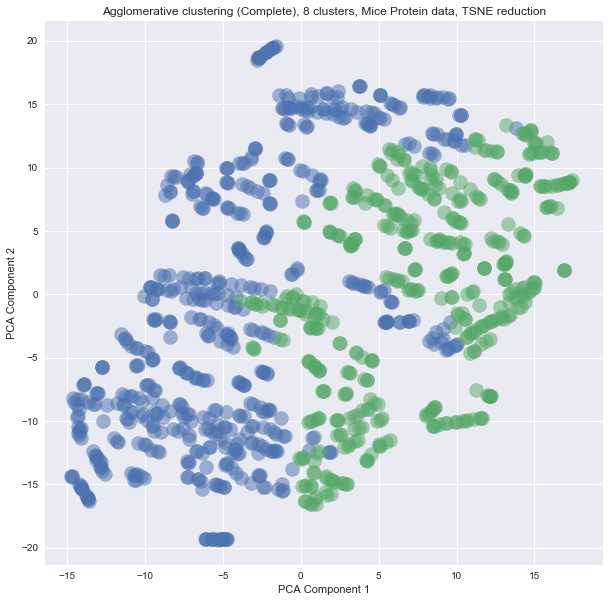

In [15]:
aggmodel = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(mice_data)

print(calinski_harabaz_score(mice_data, aggmodel.labels_))
print(silhouette_score(mice_data, aggmodel.labels_))

treats = ['Memantine', 'Saline']

mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in set(aggmodel.labels_):
    ax.scatter(mice_tsne.embedding_[:, 0][aggmodel.labels_ == i], mice_tsne.embedding_[:, 1][aggmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
ax.set_title('Agglomerative clustering (Complete), 8 clusters, Mice Protein data, TSNE reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.show()

In [20]:
mice_control = mice_filled[(mice_filled.Genotype == 'Control') & (mice_filled.Behavior == 'C/S')]
mice_control.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [21]:
mice_control_data = mice_control[mice_control.columns[1:-4]].values


array([[ 0.50364388,  0.74719322,  0.4301753 , ...,  0.13179003,
         0.1281856 ,  1.67565235],
       [ 0.51461708,  0.68906355,  0.41177034, ...,  0.13510297,
         0.1311187 ,  1.74360965],
       [ 0.50918309,  0.7302468 ,  0.41830878, ...,  0.13336183,
         0.12743108,  1.92642659],
       ..., 
       [ 0.35044384,  0.45619452,  0.35623311, ...,  0.        ,
         0.        ,  1.42117858],
       [ 0.39941447,  0.496445  ,  0.36888331, ...,  0.        ,
         0.        ,  1.47791654],
       [ 0.34780967,  0.46978852,  0.34441088, ...,  0.        ,
         0.        ,  1.45351271]])

112.900811816
0.266450242734


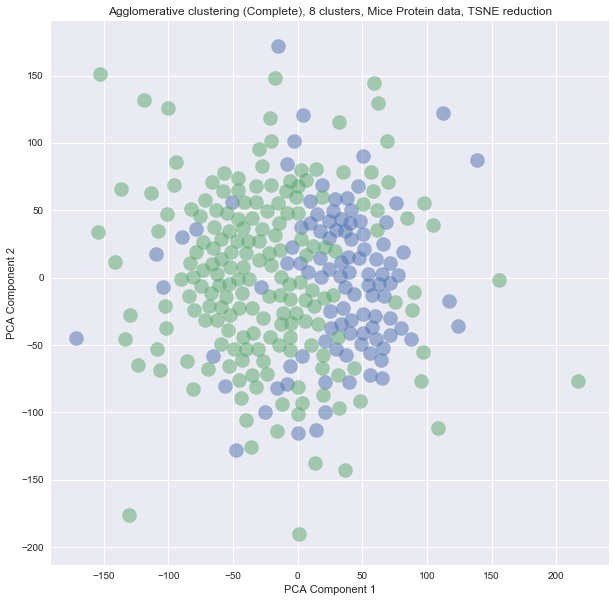

In [23]:
aggmodel = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(mice_control_data)

print(calinski_harabaz_score(mice_control_data, aggmodel.labels_))
print(silhouette_score(mice_control_data, aggmodel.labels_))

treats = ['Memantine', 'Saline']

mice_tsne = TSNE(n_components=2, init='pca', 
              perplexity=50, n_iter=300, random_state=5).fit(mice_control_data)
fig, ax = plt.subplots(figsize=(10, 10))
for i in set(aggmodel.labels_):
    ax.scatter(mice_tsne.embedding_[:, 0][aggmodel.labels_ == i], mice_tsne.embedding_[:, 1][aggmodel.labels_ == i], s=200, alpha = .5, cmap=cm.coolwarm)
ax.set_title('Agglomerative clustering (Complete), 8 clusters, Mice Protein data, TSNE reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.show()